# CÂU 5

Viết đoạn code mẫu bằng Python (sử dụng Scikit-learn) để triển khai phân cụm đa cấp hợp nhất 
(agglomerative clustering) không? Hãy mô tả các bước thực hiện

### 1. Nạp thư viện 

In [2]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt

### 2. Đọc dữ liệu

In [3]:
wine_df = pd.read_csv("wine-clustering.csv")

### Xây dựng mô hình phân cụm đa cấp (Agglomerative Clustering)

In [4]:
ac = AgglomerativeClustering(
    n_clusters=3,        # số cụm cần tạo
    linkage='average'    # phương pháp gộp (ward, complete, average, single)
)


### Huấn luyện mô hình và dự đoán cụm

In [5]:
ac_clusters = ac.fit_predict(wine_df)

### Trực quan hóa kết quả phân cụm

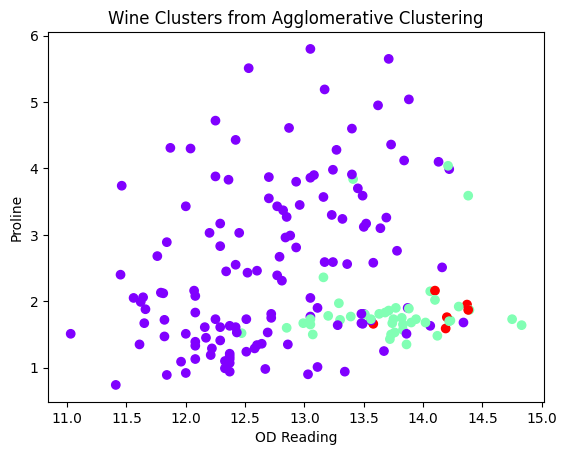

In [6]:

plt.scatter(wine_df.values[:, 0], wine_df.values[:, 1], c=ac_clusters, cmap='rainbow')
plt.title("Wine Clusters from Agglomerative Clustering")
plt.xlabel("OD Reading")
plt.ylabel("Proline")
plt.show()



In [7]:
score = silhouette_score(wine_df, ac_clusters)
print("Silhouette Score:", score)

Silhouette Score: 0.6100753288756409


# CÂU 6

Làm thế nào để vẽ dendrogram trong Python sử dụng thư viện như scipy hoặc matplotlib? Hãy chia sẻ một đoạn code mẫu

# 1.Nạp thư viện

In [9]:

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt



# 2. Tạo dữ liệu giả (dummy data)

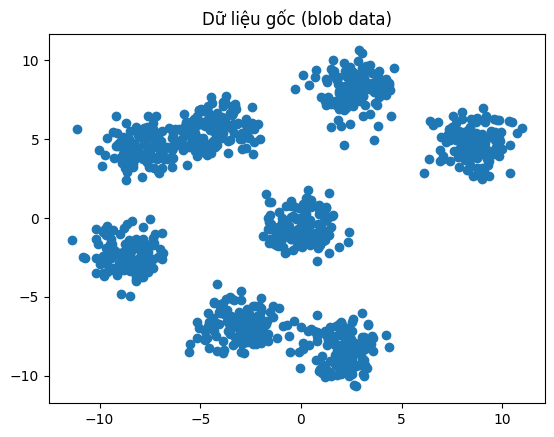

In [ ]:

X, y = make_blobs(n_samples=1000, centers=8, n_features=2, random_state=800)
plt.scatter(X[:,0], X[:,1])
plt.title("Dữ liệu gốc (blob data)")
plt.show()



### 3. Tính ma trận khoảng cách giữa các điểm dữ liệu

In [ ]:

distances = linkage(X, method="centroid", metric="euclidean")



### 4. Hàm vẽ dendrogram có chú thích 

In [14]:

def annotated_dendrogram(*args, **kwargs):
    # Vẽ dendrogram chuẩn từ scipy
    scipy_dendro = dendrogram(
        *args,
        truncate_mode='lastp',      # rút gọn các nhánh nhỏ
        show_contracted=True,       # hiển thị các nhóm gộp
        leaf_rotation=90.,          # xoay nhãn cụm 90 độ
    )
    plt.title('Blob Data Dendrogram')
    plt.xlabel('Cluster size')
    plt.ylabel('Distance')

    # Ghi chú (annotate) độ cao các nhánh lớn
    for i, d, c in zip(scipy_dendro['icoord'], scipy_dendro['dcoord'], scipy_dendro['color_list']):
        x = 0.5 * sum(i[1:3])
        y = d[1]
        if y > 10:  # chỉ ghi nhãn cho các nhánh cao
            plt.plot(x, y, 'o', c=c)
            plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                         textcoords='offset points',
                         va='top', ha='center')
    return scipy_dendro




### 5. Gọi hàm để vẽ

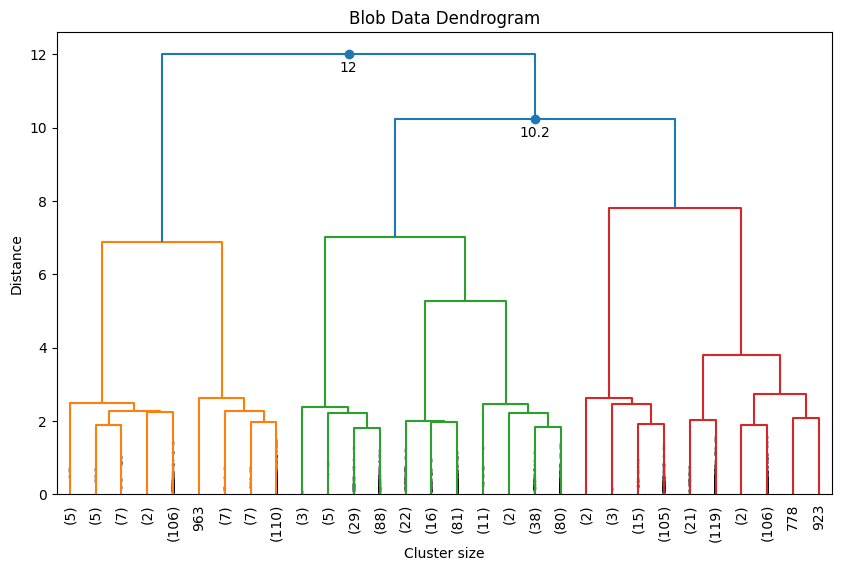

In [15]:

plt.figure(figsize=(10, 6))
dn = annotated_dendrogram(distances)
plt.show()